# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
#from __future__ import division, print_function, absolute_import
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
if not os.path.exists('figures/Result'):
    os.makedirs('figures/Result')

In [3]:
t_titre = 35
t_label = 25
fig_width= 15
exts = ['.png', '.svg', '.pdf']
dpi = 400

In [4]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
observer = None #'AM'
mode = 'pari'

from aSPEM import Analysis
e = Analysis(observer=observer, mode=mode, name_file_fit='fct_velocity_sigmo')

In [5]:
opt = {'t_titre':80, 't_label':60, 'titre':'', 'color_r':'r'}

proba = 'real', 'bcp'

mode_bcp = 'fixed', 'max', 'expectation', 'mean'

result = 'bet', 'acceleration', 'velocity'

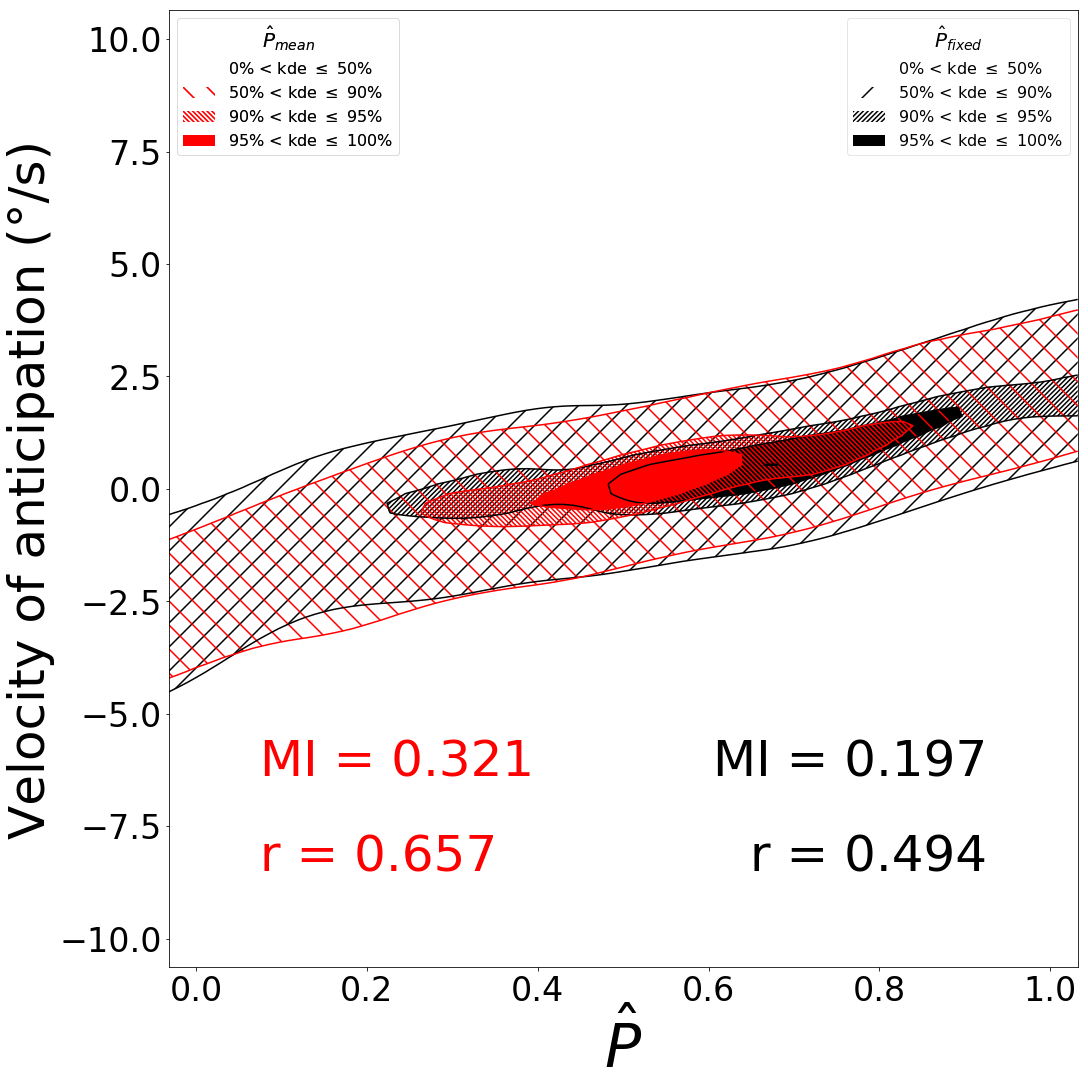

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)
#levels = ['0', '0.5', '0.9', '0.95', '1']
levels = ['0%', '50%', '90%', '95%', '100%']

opt['line_r'] = False
opt['color_r'] = 'k'

opts_kde = dict(conditional_kde=True,  nb_point_kde=100j)
axs = e.comparison(ax=axs, result='velocity', mode_bcp='fixed', hatch=True, 
                   show='kde', color_kde='k', alpha=1, levels=levels,
                   pos_r='right', **opts_kde, **opt)


opt['color_r'] = 'r'
axs = e.comparison(ax=axs, result='velocity', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde='r', alpha=1, pos_r='left', **opts_kde, **opt)

for ext in exts: fig.savefig(f'{msfigpath}/4_A_result_psycho_aSPEM' + ext, dpi=dpi)

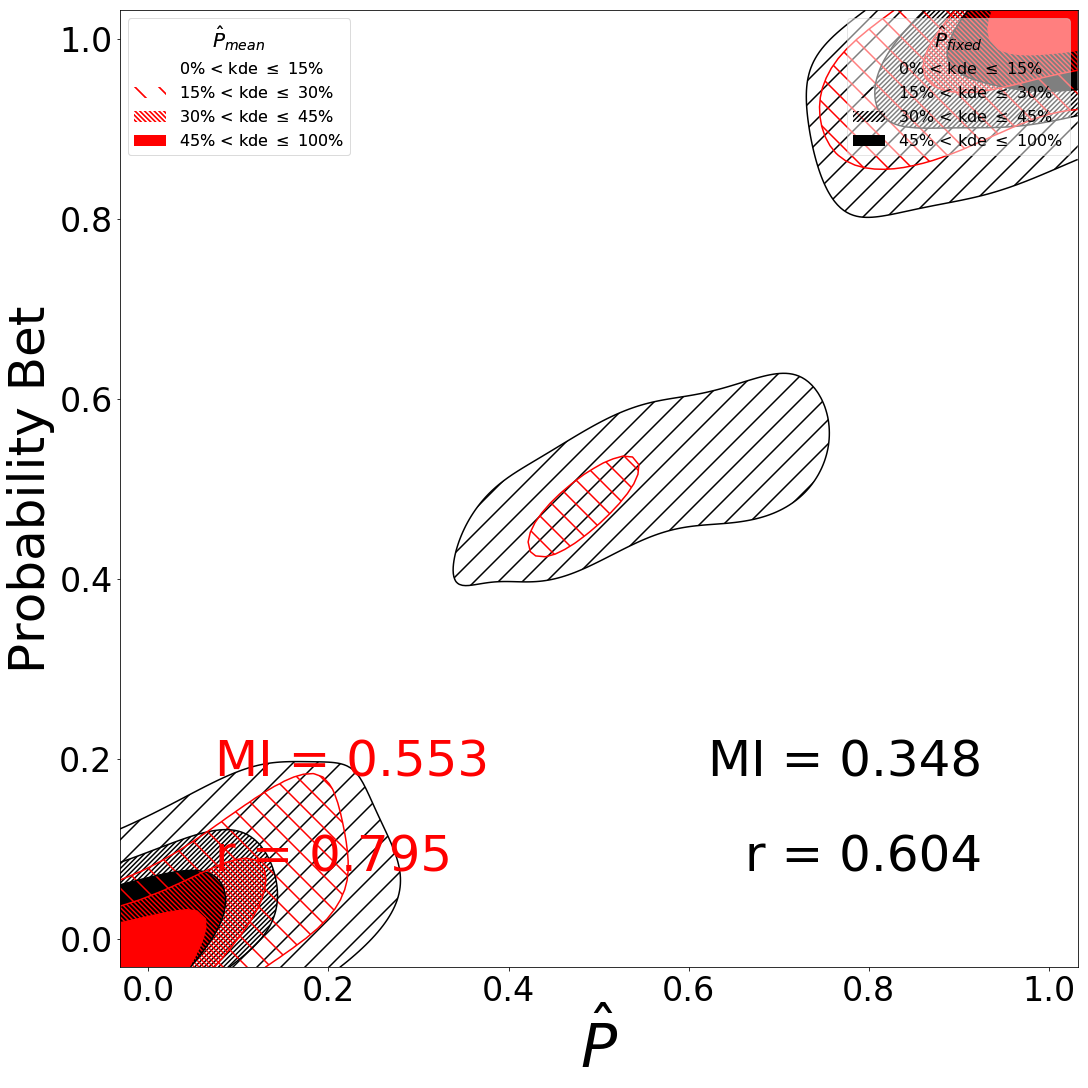

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)

levels = ['0%', '15%', '30%', '45%', '100%']

opt['color_r'] = 'k'
axs = e.comparison(ax=axs, result='bet', mode_bcp='fixed', hatch=True, hatch_symbol = '/',
                   show='kde', color_kde='k', alpha=1, levels=levels,
                   pos_r='right', **opt)

opt['color_r'] = 'r'
axs = e.comparison(ax=axs, result='bet', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde='r', alpha=1, pos_r='left', **opts_kde, **opt)

for ext in exts: fig.savefig(f'{msfigpath}/4_B_result_psycho_bet' + ext, dpi=dpi)

In [8]:
opt['line_r'] = True

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


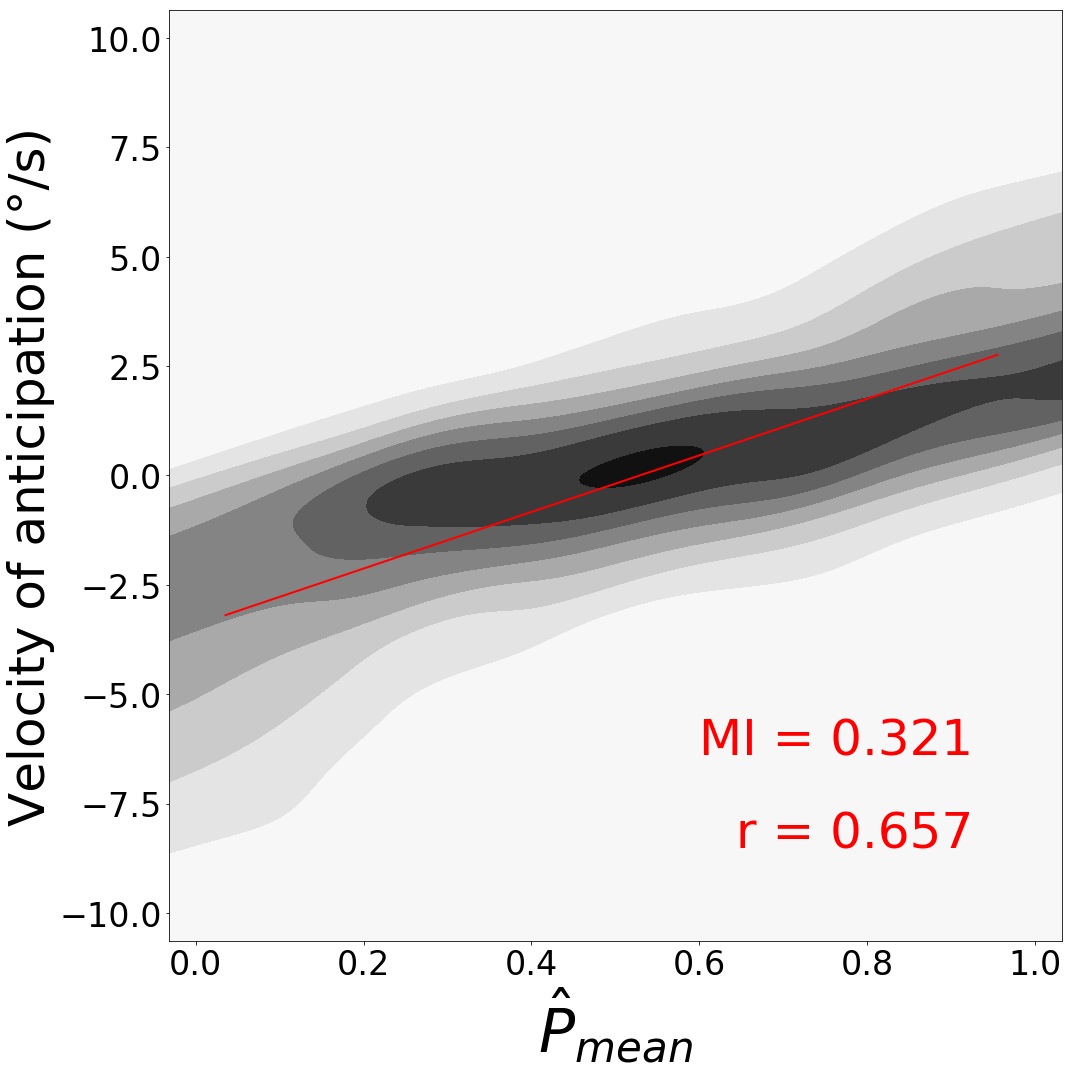

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width),constrained_layout=True)
axs = e.comparison(ax=axs, result='velocity', show='kde',
                   nb_point_kde=300j, **opt)
fig.tight_layout()
#for ext in exts: fig.savefig('ms/figures/4_A_result_psycho_velo_sigmo' + ext, dpi=dpi)

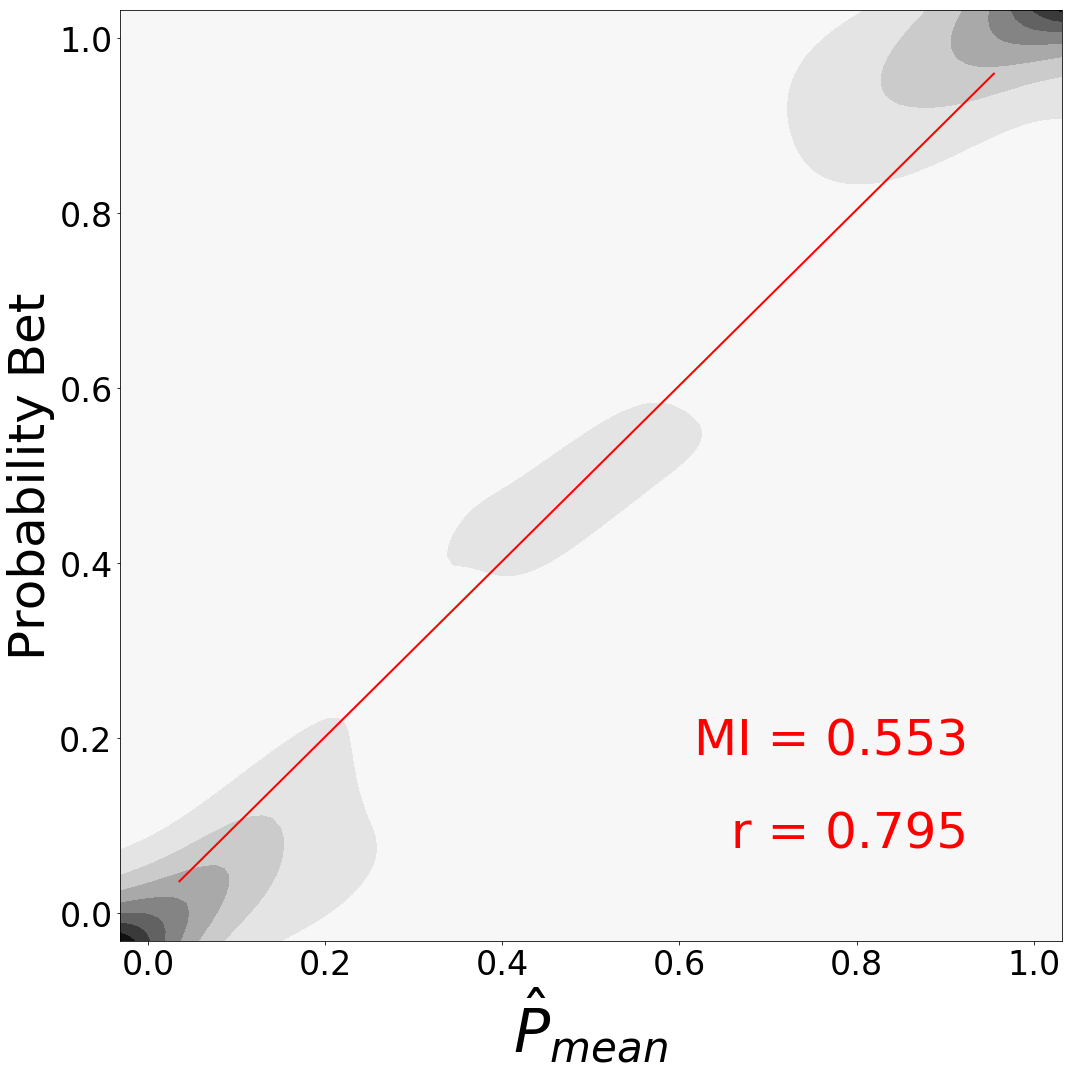

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width), constrained_layout=True)
axs = e.comparison(ax=axs, nb_point_kde=100j,  **opt)
fig.tight_layout()
#for ext in exts: fig.savefig('ms/figures/4_B_result_psycho_bet' + ext, dpi=dpi)

scatterKDE


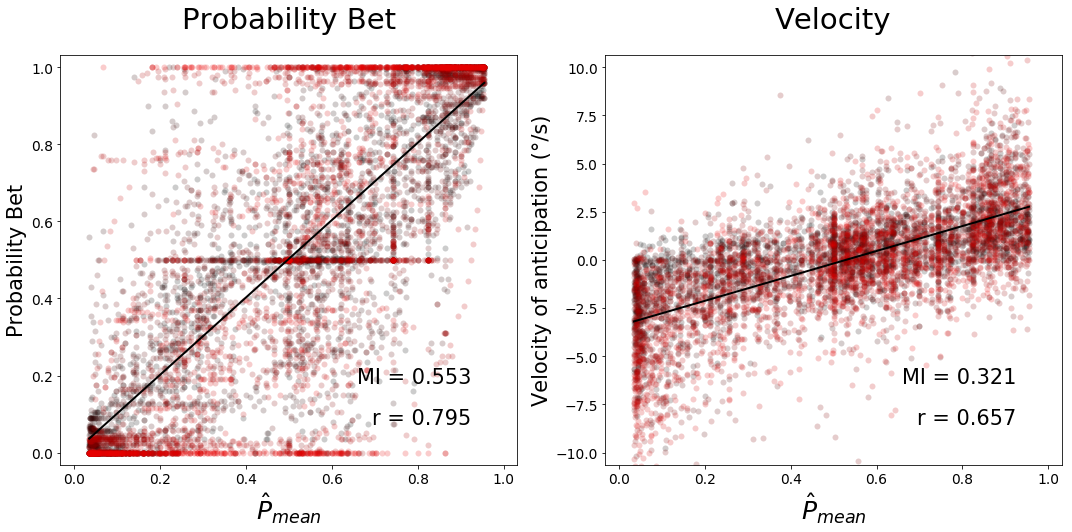

scatterKDE


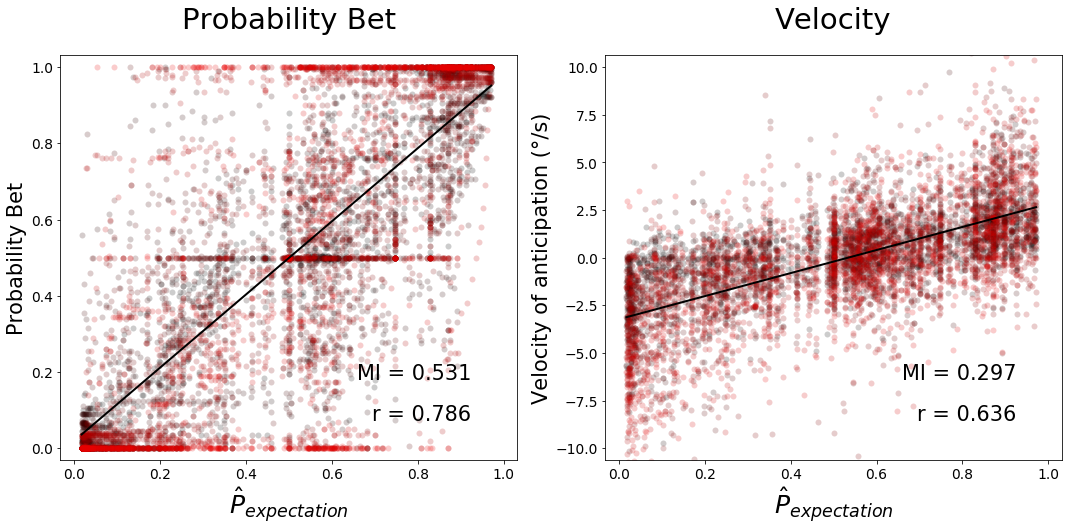

scatterKDE


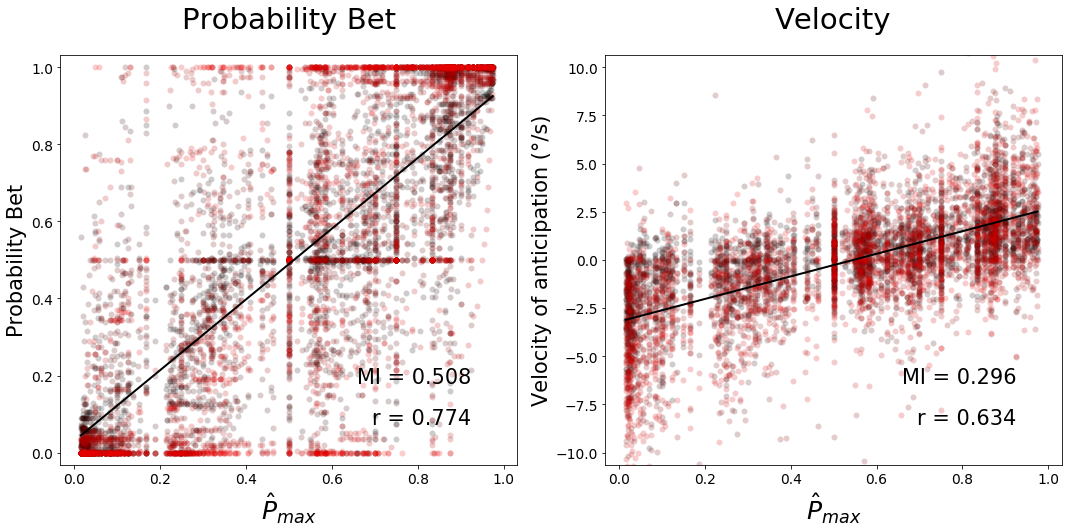

scatterKDE


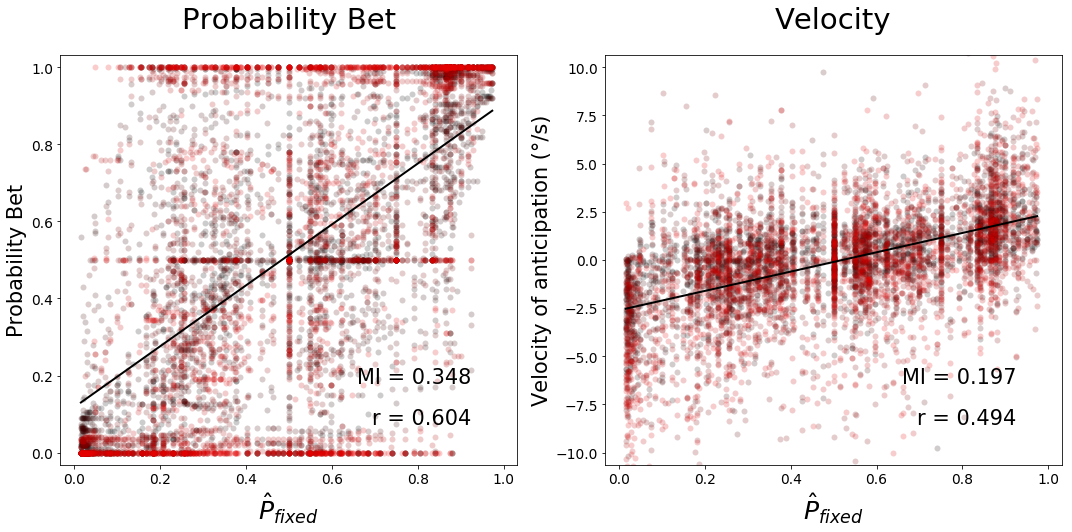

In [ ]:
for mode in ['mean', 'expectation', 'max', 'fixed']:
    fig, ax = e.plot_results(mode_bcp=mode, plot='scatterKDE')
    plt.subplots_adjust(hspace=0.1)
    fig.tight_layout()
    #for ext in exts: fig.savefig('figures/Result/scatter_velocity_sigmo_' + mode + ext, dpi=dpi)
    plt.show()


scatterKDE


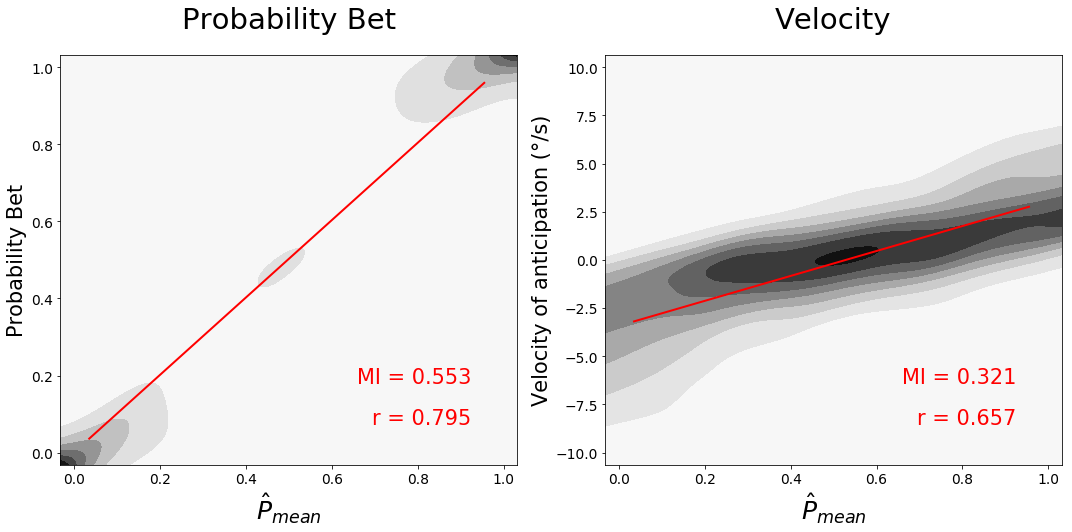

scatterKDE


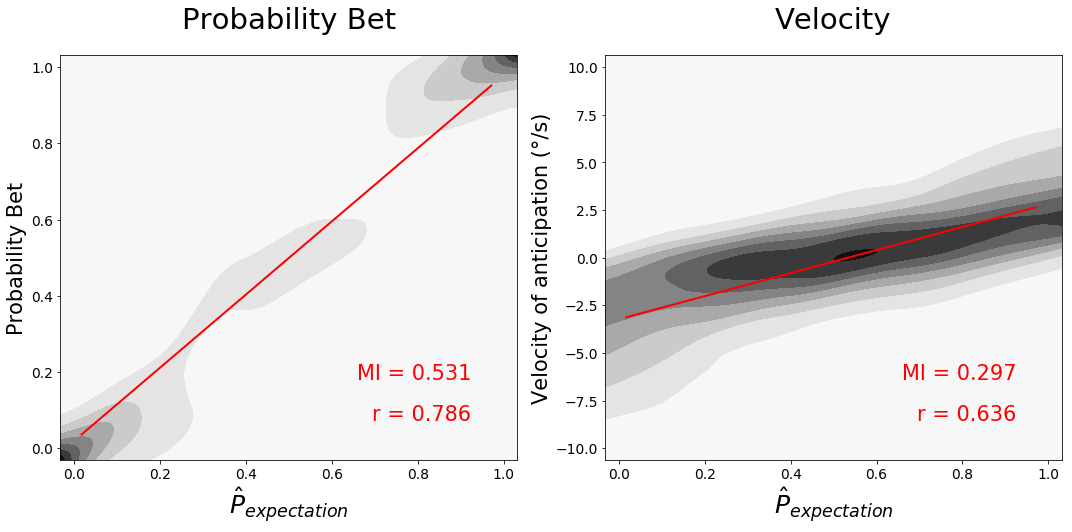

scatterKDE


In [ ]:
for mode in ['mean', 'expectation', 'max', 'fixed']:
    fig, axs = e.plot_results(mode_bcp=mode, plot='scatterKDE', show='kde')
    plt.subplots_adjust(hspace=0.1)
    fig.tight_layout()
    #for ext in exts: fig.savefig('figures/Result/kde_mean_velocity_sigmo_' + mode + ext, dpi=dpi)
    plt.show()

In [ ]:
for i_sujet, sujet_ in enumerate([[6, 10], [5, 2]]):
    fig, axs = e.plot_results(sujet=sujet_, plot='sujet')
    #for ext in exts: fig.savefig('figures/Result/Results_BCP_velocity_sigmo_' + str(i_sujet) + ext, dpi=dpi)
    plt.show()

In [ ]:
sujet = [6, 10, 5, 2]
for sujet_ in sujet:
    fig, axs = e.plot_results(sujet=[sujet_])
    #for ext in exts: fig.savefig('figures/Result/Results_BCP_velocity_sigmo_sujet_' + str(sujet_) + ext, dpi=dpi)
    plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width, 2*fig_width/2.2))
opt = {'t_titre':35/1.5, 't_label':25/1.5}

axs[0][0] = e.comparison(ax=axs[0][0], conditional_kde=False, **opt)
axs[0][1] = e.comparison(ax=axs[0][1], conditional_kde=False, result='velocity', **opt)

axs[1][0] = e.comparison(ax=axs[1][0], **opt)
axs[1][1] = e.comparison(ax=axs[1][1], result='velocity', **opt)

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
def kde(x, ax1, ax2, proba='bcp', mode_bcp='mean', **opt) :
        
    gs = gridspec.GridSpec(2, 1)
    gs.update(left=x/5+(0.15*x), bottom=0, right=(x+1)/5+(0.15*x), top=1, hspace=0.3)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1 = e.comparison(ax=ax1, proba=proba, mode_bcp=mode_bcp, **opt)
    ax2 = e.comparison(ax=ax2, proba=proba, mode_bcp=mode_bcp, result='velocity', **opt)
    
    return ax1, ax2

In [ ]:
opt = dict(t_titre=35/1.5, t_label=25/1.5, conditional_kde=True)
for i_layer in range(5) :
    print(i_layer)
    fig, axs = plt.subplots(2, i_layer+1, figsize=(fig_width*2, fig_width), constrained_layout=True)
    for i, ax in enumerate(axs.ravel()) : ax.cla()
    
    if i_layer == 0 : axs[0], axs[1] = kde(1, axs[0], axs[1], proba='real', **opt)
    else :
        axs[0][0], axs[1][0] = kde(0, axs[0][0], axs[1][0], proba='real', **opt)
        if i_layer > 0 : axs[0][1], axs[1][1] = kde(1, axs[0][1], axs[1][1], mode_bcp='fixed', **opt)
        if i_layer > 1 : axs[0][2], axs[1][2] = kde(2, axs[0][2], axs[1][2], mode_bcp='max', **opt)
        if i_layer > 2 : axs[0][3], axs[1][3] = kde(3, axs[0][3], axs[1][3], mode_bcp='expectation', **opt)
        if i_layer > 3 : axs[0][4], axs[1][4] = kde(4, axs[0][4], axs[1][4], mode_bcp='mean', **opt)
                
    #for ext in exts: fig.savefig('figures/Result/kde_mean_velocity_sigmo_' + str(i_layer) + ext, dpi=dpi)
    plt.show()